In [16]:
#Importing necessary libraries and uploading the premier league dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


premier_league = pd.read_csv("PremierLeague.csv")
premier_league["Date"] = pd.to_datetime(premier_league["Date"], errors="coerce")
premier_league.dropna(subset=['FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals'], inplace=True)

# Filter for matches from 2014 onwards, I did this to try and get enough historical data but also maintain relevancy 
premier_league_filtered = premier_league[premier_league['Date'].dt.year >= 2014]

# Creating Goal difference for target variable 
premier_league_filtered['GoalDifference'] = (premier_league_filtered['FullTimeHomeTeamGoals'] - premier_league_filtered['FullTimeAwayTeamGoals'])

premier_league_filtered.head()

/var/folders/13/bfywv8gj5zsgh213pftjlz8m0000gn/T/ipykernel_7139/2395902370.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premier_league_filtered['GoalDifference'] = (premier_league_filtered['FullTimeHomeTeamGoals'] - premier_league_filtered['FullTimeAwayTeamGoals'])


,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints,GoalDifference
7790,2013-2014_Arsenal_Cardiff,2013-2014,20,2014-01-01,NaN,Arsenal,Cardiff,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,2
7791,2013-2014_Crystal Palace_Norwich,2013-2014,20,2014-01-01,NaN,Crystal Palace,Norwich,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0
7792,2013-2014_Fulham_West Ham,2013-2014,20,2014-01-01,NaN,Fulham,West Ham,2,1,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,1
7793,2013-2014_Liverpool_Hull,2013-2014,20,2014-01-01,NaN,Liverpool,Hull,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,2
7794,2013-2014_Man United_Tottenham,2013-2014,20,2014-01-01,NaN,Man United,Tottenham,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,-1


To begin, I imported all necessary libraries needed for the project. I then uploaded the premier league csv file and started to filter through the file adjusting so the data is only from 2014- present. I decided on 2014 because it gives us at least a decade worth of historical data to draw from but also maintains some relevancy to the current season. I also created the target variable GoalDifference, which takes the difference between home and away team goals. Finally, I displayed the new data frame to ensure the newe variable was added. 

In [17]:
# Feature engineering
premier_league_filtered['year'] = premier_league_filtered['Date'].dt.year
premier_league_filtered['month'] = premier_league_filtered['Date'].dt.month
dummy_teams = pd.get_dummies(premier_league_filtered[['HomeTeam', 'AwayTeam']])
premier_league_filtered = pd.concat([premier_league_filtered, dummy_teams], axis=1)
 
features = ['HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals', 'year', 'month']
X = pd.concat([premier_league_filtered[features], dummy_teams], axis=1)
y = premier_league_filtered['GoalDifference']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

models = {
    "Random Forest": RandomForestRegressor(max_depth=35, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42),
    "Lasso Regression": Lasso(alpha=0.1, random_state=42)
}

# Current premier league teams and filtering out relegated teams 
valid_teams = [
    "Arsenal", "Aston Villa", "Bournemouth", "Brentford", "Brighton",
    "Chelsea", "Crystal Palace", "Everton", "Fulham", "Liverpool",
    "Man City", "Man United", "Newcastle", "Nott'm Forest",
    "Tottenham", "West Ham", "Wolves", "Leicester","Southampton","Ipswich"
]

/var/folders/13/bfywv8gj5zsgh213pftjlz8m0000gn/T/ipykernel_7139/2701443335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premier_league_filtered['year'] = premier_league_filtered['Date'].dt.year
/var/folders/13/bfywv8gj5zsgh213pftjlz8m0000gn/T/ipykernel_7139/2701443335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premier_league_filtered['month'] = premier_league_filtered['Date'].dt.month


The next chunk of code contains feature engineering. It takes the new Premier_league_filtered data and adds new variables such as "year" and "month" to split up the orginal date column. I also added a dummy variable to simulate a teams home and away columns. So with this dummy variable we now can have "Mancity_Home" and "Mancity_Away", and it is added back to the premier_league_filtered dataframe. The data is split into training and testing sets, 80% for training and 20% for testing. Then the models are defined followed by ensuring that the relagated teams from the previous season are not in the current season predictions.

In [18]:
#Training the models 
results = []
standings_dict = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics to identify how models are performing 
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })

    #  Predictions for 2024/25 season standings 
    matches_2024 = premier_league_filtered[premier_league_filtered['year'] == 2024]
    X_matches_2024 = matches_2024[X.columns]
    matches_2024['PredictedGoalDifference'] = model.predict(X_matches_2024) 
    matches_2024 = matches_2024[
        matches_2024['HomeTeam'].isin(valid_teams) & matches_2024['AwayTeam'].isin(valid_teams)
    ]

    # team standing calculation
    teams = pd.concat([matches_2024['HomeTeam'], matches_2024['AwayTeam']]).unique()
    standings = {team: 0 for team in teams}

    for _, row in matches_2024.iterrows():
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']
        goal_difference = row['PredictedGoalDifference']

        if goal_difference > 0:  
            standings[home_team] += 3
        elif goal_difference == 0:  
            standings[home_team] += 1
            standings[away_team] += 1
        else:  
            standings[away_team] += 3

    standings_df = pd.DataFrame(standings.items(), columns=['Team', 'Points']).sort_values(by='Points', ascending=False)
    standings_dict[name] = standings_df


results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)


Training Random Forest...


/var/folders/13/bfywv8gj5zsgh213pftjlz8m0000gn/T/ipykernel_7139/2308290597.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_2024['PredictedGoalDifference'] = model.predict(X_matches_2024)



Training Gradient Boosting...


/var/folders/13/bfywv8gj5zsgh213pftjlz8m0000gn/T/ipykernel_7139/2308290597.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_2024['PredictedGoalDifference'] = model.predict(X_matches_2024)



Training XGBoost...

Training Lasso Regression...

Model Performance Comparison:
               Model       MAE       MSE      RMSE        R²
0      Random Forest  1.064865  1.786743  1.336691  0.515230
1  Gradient Boosting  1.016272  1.671929  1.293031  0.546381
2            XGBoost  1.012762  1.651388  1.285064  0.551954
3   Lasso Regression  1.052439  1.827933  1.352011  0.504055


/var/folders/13/bfywv8gj5zsgh213pftjlz8m0000gn/T/ipykernel_7139/2308290597.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_2024['PredictedGoalDifference'] = model.predict(X_matches_2024)
/var/folders/13/bfywv8gj5zsgh213pftjlz8m0000gn/T/ipykernel_7139/2308290597.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_2024['PredictedGoalDifference'] = model.predict(X_matches_2024)


The code above involves training the models previously defined. We are comparing a random forest regression, gradient booster, xgboost, and lasso regression. I chose these models because they are all suitable for regression problems as well as handling the dummy variables which could cause higher dimesionality, and also predicting goal differences accurately. The code also includes metrics such as mean absolute error, mean squared error, root mean square devation(rmse), and r squared. These will help evaluate the models predictions. Following the metrics, I filtered the dataset to get matches for the 2024/25 season and used X_matches_2024 to extract these features. This will predict the GoalDifference and add it to the a new column called PredictedGoalDifference. A dictionary is provided to initialize the teams points. The for loop does the actual calulation as it iterates over the predicted matches by adding 3 points for a home team win, 1 for a draw, and 3 for an away team win. These results are then added to the standings dictionary which is then covnerted to a data frame to sort by points and save for the models. Finally I printed and compared the models. The results reflect how well the models predict goal difference. The scores are not necessarily the most ideal. However, given the uncertainty of soccer matches and unpredictable features, the standings are based of cumulative points throughout the entire season which can reduce the impact of smaller prediction errors. 

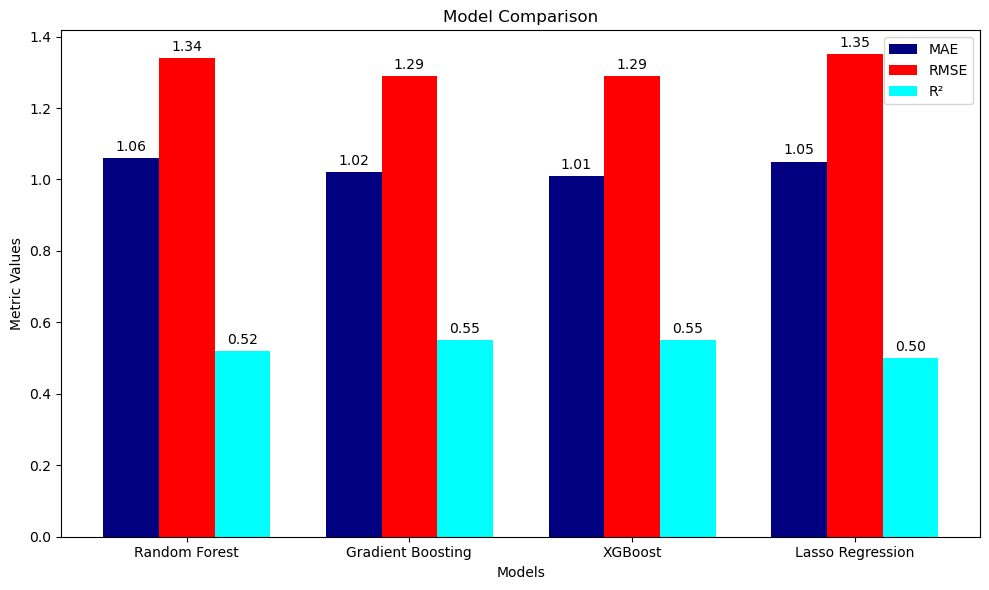

In [20]:
models = ["Random Forest", "Gradient Boosting", "XGBoost", "Lasso Regression"]
mae = [1.06, 1.02, 1.01, 1.05]
rmse = [1.34, 1.29, 1.29, 1.35]
r2 = [0.52, 0.55, 0.55, 0.50]

x = np.arange(len(models)) 
width = 0.25  

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, mae, width, label='MAE', color='navy')
rects2 = ax.bar(x, rmse, width, label='RMSE', color='red')
rects3 = ax.bar(x + width, r2, width, label='R²', color='cyan')

ax.set_xlabel('Models')
ax.set_ylabel('Metric Values')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

In the cell above, I took all the models used as well as the metrics to create a visual to compare them all at once. I set up the chart postions, created the figure and bars, added labels, and then created a loop to add metrics for each bar. 

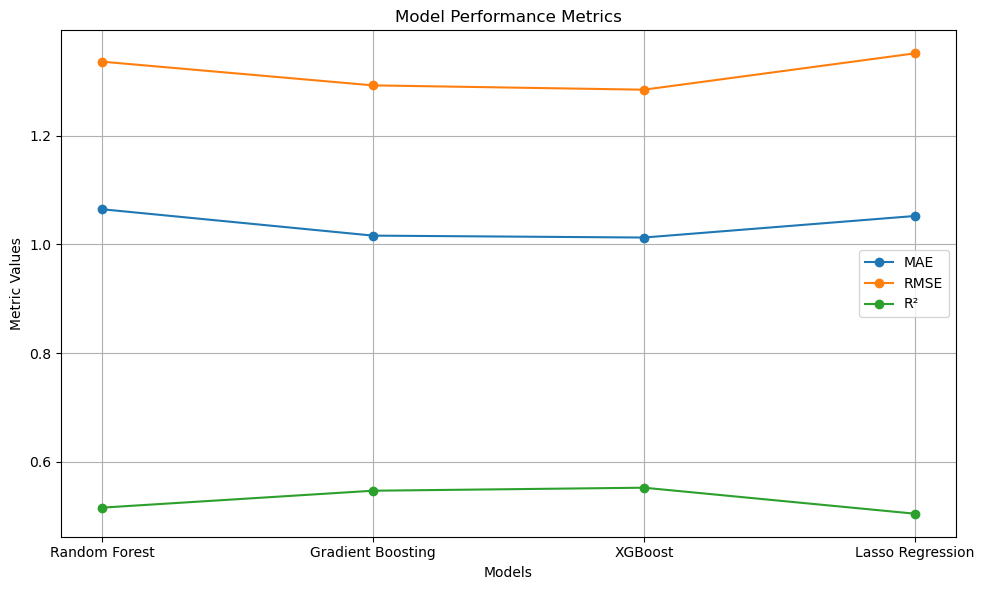


Random Forest Predicted Standings:
              Team  Points
15        Man City      75
6          Arsenal      66
0        Liverpool      57
2          Chelsea      45
13       Tottenham      45
12     Aston Villa      42
3        Newcastle      39
11          Fulham      36
10   Nott'm Forest      36
5       Man United      36
8      Bournemouth      33
4          Everton      33
9         Brighton      30
7        Brentford      30
16  Crystal Palace      27
1         West Ham      24
14          Wolves      18
17         Ipswich      12
18       Leicester       6
19     Southampton       6


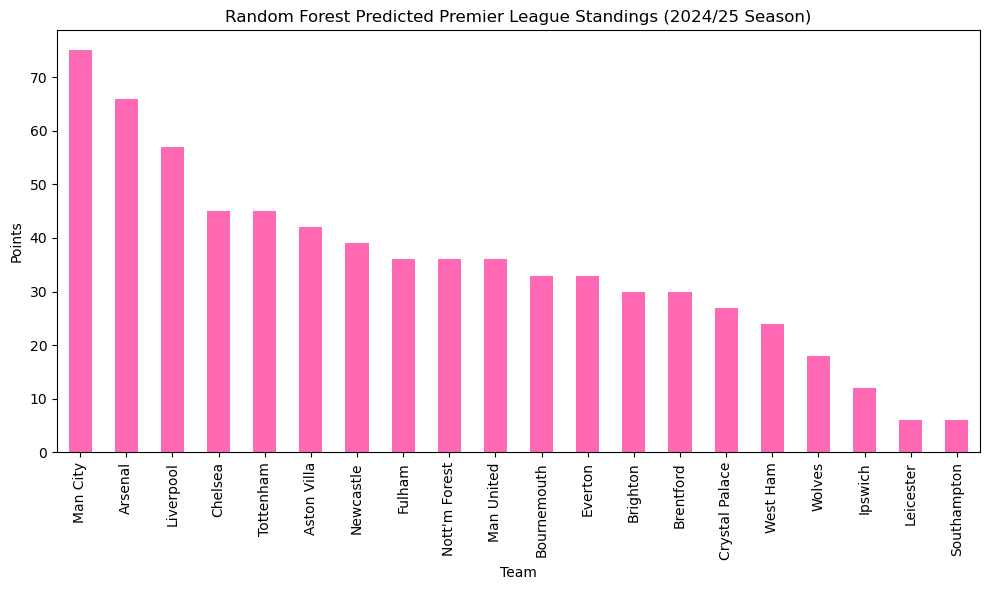


Gradient Boosting Predicted Standings:
              Team  Points
6          Arsenal      69
15        Man City      66
0        Liverpool      57
2          Chelsea      54
9         Brighton      42
16  Crystal Palace      36
3        Newcastle      36
4          Everton      36
5       Man United      36
7        Brentford      36
8      Bournemouth      33
12     Aston Villa      33
13       Tottenham      33
11          Fulham      30
1         West Ham      27
14          Wolves      27
10   Nott'm Forest      24
18       Leicester      12
19     Southampton       6
17         Ipswich       3


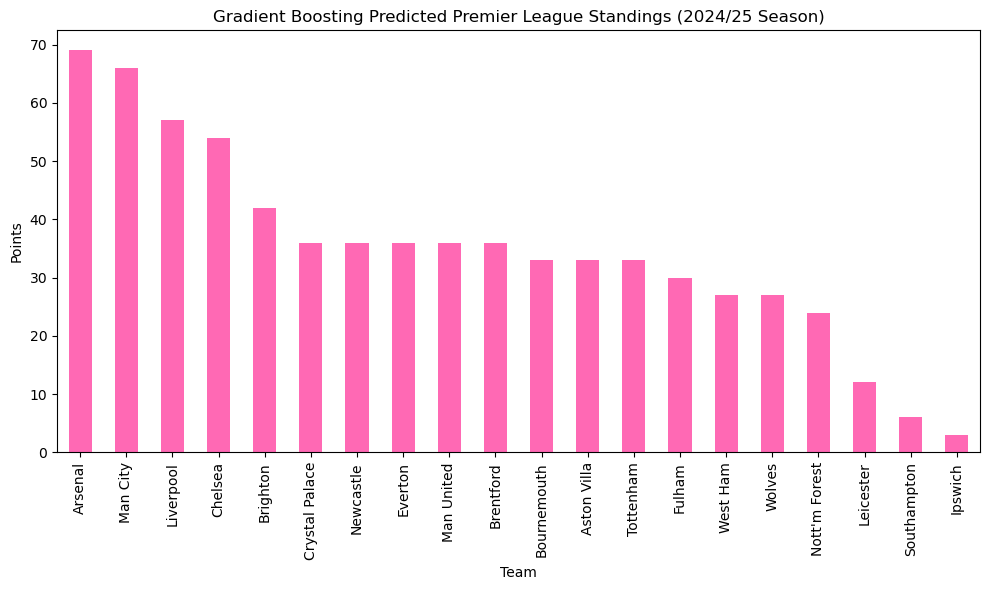


XGBoost Predicted Standings:
              Team  Points
6          Arsenal      69
15        Man City      66
0        Liverpool      57
2          Chelsea      54
9         Brighton      42
7        Brentford      39
3        Newcastle      36
4          Everton      36
16  Crystal Palace      36
12     Aston Villa      36
5       Man United      33
8      Bournemouth      33
13       Tottenham      33
11          Fulham      30
10   Nott'm Forest      27
14          Wolves      24
1         West Ham      24
18       Leicester      12
19     Southampton       6
17         Ipswich       3


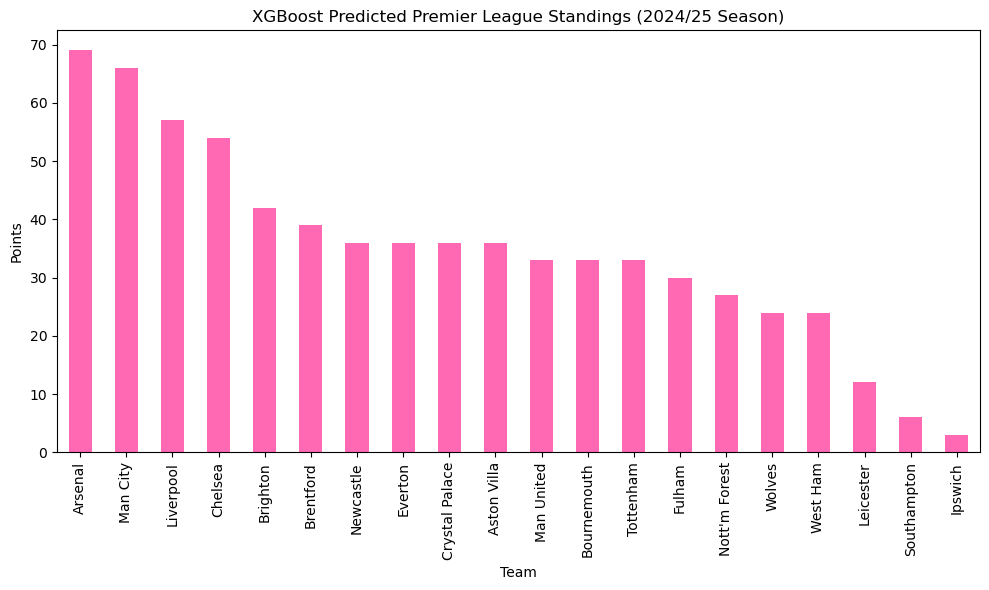


Lasso Regression Predicted Standings:
              Team  Points
6          Arsenal      57
15        Man City      54
0        Liverpool      45
2          Chelsea      45
7        Brentford      42
8      Bournemouth      42
9         Brighton      42
16  Crystal Palace      39
12     Aston Villa      39
11          Fulham      36
10   Nott'm Forest      36
4          Everton      36
5       Man United      33
13       Tottenham      33
3        Newcastle      33
1         West Ham      27
14          Wolves      27
19     Southampton      12
17         Ipswich       9
18       Leicester       9


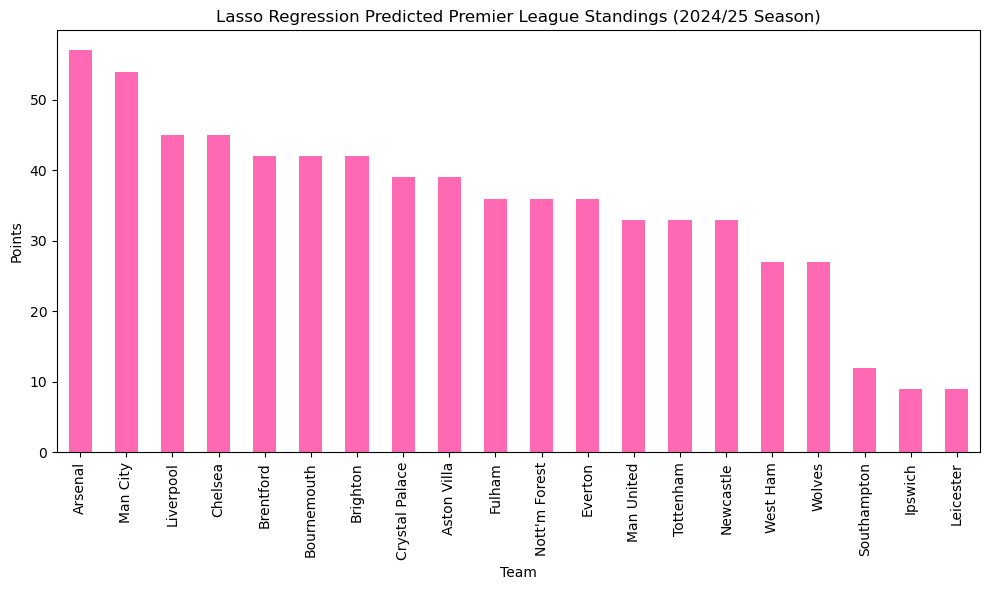

In [19]:
plt.figure(figsize=(10, 6))
for metric in ["MAE", "RMSE", "R²"]:
    plt.plot(results_df["Model"], results_df[metric], marker='o', label=metric)

plt.title("Model Performance Metrics")
plt.xlabel("Models")
plt.ylabel("Metric Values")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

for name, standings in standings_dict.items():
    print(f"\n{name} Predicted Standings:")
    print(standings)

    standings.plot(kind='bar', x='Team', y='Points', legend=False, figsize=(10, 6), color="hotpink")
    plt.title(f"{name} Predicted Premier League Standings (2024/25 Season)")
    plt.xlabel("Team")
    plt.ylabel("Points")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In this last cell, I printed out each models predicted standings as well as a bar chart to visualize those standings. 